# Example 1-1

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os


In [9]:
# Load the data
datasets_dir = os.path.join(os.getcwd(), "data")
life_satisfaction_data = os.path.join(datasets_dir, "lifesat")

# Organisation for Economic Co-operation and Development (OECD)
oecd_bli_fp = os.path.join(life_satisfaction_data, "oecd_bli_2015.csv")

# Better Life Index (BLI)
gdp_per_capita_fp = os.path.join(life_satisfaction_data, "gdp_per_capita.csv")

In [10]:
oecd_bli_df = pd.read_csv(filepath_or_buffer=oecd_bli_fp, thousands=',')

gdp_per_capita_df = pd.read_csv(filepath_or_buffer=gdp_per_capita_fp,
                                   thousands=',',
                                   sep='\t', 
                                   encoding='latin1')

# Notes:
# arg -> thousands=',': Thousands separator (could be '.' for Latin America & Europe)

In [11]:
# Before Preparation
oecd_bli_df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [12]:
# Before preparation
gdp_per_capita_df.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [13]:
# Prepare the Data
# Taken from https://github.com/ageron/handson-ml/blob/master/01_the_machine_learning_landscape.ipynb

gdp_per_capita = gdp_per_capita_df.copy()
oecd_bli = oecd_bli_df.copy()

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [14]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


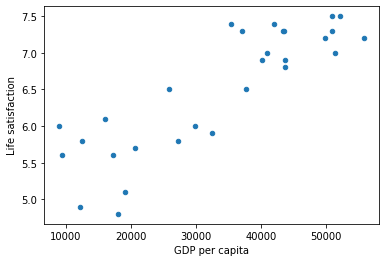

In [15]:
# Visualize the data
country_stats.plot(
    kind='scatter',
    x='GDP per capita',
    y='Life satisfaction'
)

plt.show()

In [16]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [17]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new))

[[5.96242338]]


In [57]:
# Try out K-Nearest Neighbords Regression Model
import sklearn.neighbors
knn_reg_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg_model.fit(x, y)
print(knn_reg_model.predict(X_new))

[[5.76666667]]


In [ ]:
def drive_car():
    if about_to_crash():
        hit_brakes()

def gradient_descent():
    values = intial
    while first_derivative() !=0
        values = update_values()
    local_min_values = values
    y = values[0] + x*values[1] + x^2 * values[3]
    cost = rmse


## Exercises

In [6]:
"""
1. 
    Q - How would you define Machine Learning? 
    A - An algorithm/method that allows the computer to make predictions for new instances, based on past data,
        without needing to be explicity programmed.
    Book Answer - Machine Learning is about building systems that can learn from data. Learning 
                 means getting better at some task , given some performance measure.

2.
    Q - Can you name four types of problems where it shines?
    A - 
        i. Problems w/ changing data (dynamic)
        ii. Problems with complex solutions/patterns
        iii.
        iv. 
    Book Answer - 
        i. Complex problems for which we have no algorithmic Solution
            (Detecting cancer or some disease/virus)
        ii. To replace long lists of hand-tuned rules
            For example, say you're writing instructions for a chess ai
                Rather than tell chess AI, if this then that
                    Give Rewards or Penalize.
                    If you die, bad move, penalty -1
                    If you win, reward + 1
                    ()
        iii. To build systems that adapt to fluctuating environments.
        iv. Help humans learn (data mining)

3.
    Q - What is a labeled training set?
    A - The prediction for the data (y) is given. 
    Book Answer - A labeled training set is a set training set that contains the desired solution
                  (a.k.a. a label for each instance).

4.
    Q - What are the two most common supervised tasks?
    A - Don't know
    Book Answer - The two most common supervised tasks are regression and classification.

5. 
    Q - Can you name four common supervised tasks?
    A - No, my short/mid term memory isn't that great.
    Book Answer - 
        i. Clustering
        ii. Visualization
        iii. Dimensionality Reduction
        iv. Association Rule Learning

6.
    Q - What type of Machine Learning algorithm would you use to 
        allow a robot to walk in various unknown terrains?
    A - Reinforcement Learning
    Book Answer - Reinforcement Learning is likely to perform best if we want a robot to learn to
                  walk in various unkown terrains, since this is typically the type of problem that
                  Reinforcement Learning tackles. It might be possible to express the problem as a 
                  a supervised or semisupervised learning problem, but it would be less natural.

7. 
    Q - What type of algorithm would you use to segment your customers
        into multiple groups?
    A - K-Nearest Neighbors or K-Means
    Book Answer - If you don't know how to define the groups, then you can use a clustering algorithm
                  (unsupervised learning) to segment your customers into clusters of similar customers.
                  However, if. you know what groups you would like to have, then you can feed many 
                  examples of each group into a classification algorithm (supervised learning), and it
                  will classify all your customers into these groups.

8. 
    Q - Would you frame the problem of spam detection as a supervised learning problem
        or an unsupervised learning problem?
    A - Supervised, but could be either if you're just grouping without classification labels.
    Book Answer - Spam detection is a typical supervised learning problem: the algorithm is fed
                  many emails along with their labels (spam or not spam)

9.
    Q - What is an online learning system?
    A - A system that learns from each new instance.
    Book Answer - An online learning system can learn incrementally, as opposed to a batch learning
                  system. This makes it capable of adapting rapidly to both changing data and
                  autonomous systems, and of training on very large quantities of data.

10. 
    Q - What is out-of-core learning?
    A - I forgot
    Book Answer - Out-out-core algorithms can handle vast quantities of data that cannot fit into
                  a computer's main memory. An out-of-core learning algorithmn chops the data into 
                  mini-batches and uses online learning techniques to learn from these mini-batches.

11. 
    Q - What type of learning algorithm relies on similarity measure to make predictions?
    A - Instance based learning
    Book Answer - An instance-based learning system learns the training data by heart; then, when
                  given a new instance, it uses a similarity measure to find the most similar learned
                  instances and uses them to make predictions.

eq to fit is y = m(x) + b
so our model parameters are m and b
However, we update our 'optimal' values for m and b over an amount of iterations (epochs?)

On iteration 1 we might start with m=1 and b = 0
on iteration 2 we might do m = m+eta and b = b + eta
eta is a hyper paramter
thershold = 5
if RMSE or RMA have stayed below 5 for 2+ epochs, cut off training and keep current m and b
so hyper parameers woud be eta and threshold






12. 
    Q - What is the difference between a model parameter and a learning algoritm's hyperparameter?
    A - Model parameter defines pattern of data (or at least the assumptions for it).
        For example y = mx + b -> m (slope) and b (intercept) are model parameters
        Learning Algo. Hyperparams: Learning rate, for example a limit on how the algorithm adjust 
        either m or b as it learns
    Book Answer - 
        Model Parameters - 
            A model has one or more model parameters that determine what it will predict given a new instance
            (e.g. th eslope of a linear model). A learning algorithm tries to find optimal values for these
            parameters such that the model generalizes well to new instances.
        Hyperparameters - 
            A hypterparameter is a parameter of the learning algorithm itself, not of the model (e.g. the
            amount of regularization to apply).

13. 
    Q - i. What do model based learning algorithms search for? 
        ii. What is the most common stregety they sure to succeed? 
        iii. How do they make predictions?
    A - i. Patterns in the data
        ii. Minimum Error / Maximize Accuracy
        iii. By using past data, they create a model (with assumptions of a pattern). The past data
             helps tune the model parameters (like linear slope)
     Book Answer - 
         i. Model-based learning systems search for an optimal value for the model parameters such that the
         model will generalize well to new instances.
         ii. We usually train such systems by minimizing a cost function that measures how bad the system is
         at making predictions on the training data, plus a penalty fo rmodel complexity if the model is
         regularized.
         iii. To make predictions, we feed the new instance's features into the model's prediction function, 
         using the parameter values found by the learning algorithm.

14.
    Q - Can you name four main challenges in Machine Learning?
    A - Bad Data / Bad Algoritms?
    Book Answer - 
        i. Lack of data
        ii. Poor data quality
        iii. Nonrepresentative data
        iv. Uninformative features
        v. Excessively simple models that underfit the training data
        vi. Excessively complex models that overfit the data

15.
    Q - If your model performs great on the training data but generalizes poorly to new instances,
        what is happening? Can you name three possible solutions?
    A - Overfitting the training data. Solutions below
        i. Use a simpler model (e.g. use linear regression rather than a polynomial)
        ii. Clean up data (remove non-representative data points)
        iii
    Book Answer - If a model performs great on the training data but generalizes poorly to new instances
                  the model is likely overfitting the training data (or we got extremely lucky on the 
                  training data). Possible solutions to overfitting are getting more data, simplifying the
                  model (selecting a simpler algorithm, reducing the number of parameters or features used,
                  or regularizing the model), or reducing the noise in the training data.

16. 
    Q - What is a test set, and why sould you want to use it?
    A - A test set is a portion of your data that you use to validate, or score, 
        your model after it has been trained on the training data. You want to use it
        in order to ensure that your model generalizes to new instances.
    Book Anawer - A test set is used to estimate the generalization error that a model will make on new
                  instances, before the model is launched into production.

17.
    Q - What is the purpose of a validation set?
    A - 
    Book Answer - A validation set is used to compare models. It makes it possible to select the best model
                  and tune the hyperparameters.

18. 
    Q - What is the train dev set, when do you need it, and how do you use it?
    A - 
    Book Answer - The train-dev set is used when there is a risk of mismatch between the training data and
                  the data used in the validation and the test datasets (which should always be as close as
                  posssible to the data used once the model is in production). The train-dev set is a part 
                  of the training set that's held out (the model is not trained on it). The model is trained
                  on the rest of the training  set, and evaluated on both the train-dev set and the validation
                  set. If the model performs well on on the training set but not on the train-dev set, it is
                  likely overfitting the trainning set. If it performs well on both the training set and the
                  train-dev set, but not on the validation set, then there is probably a significant data
                  mismatch between the training data and the validation + test data, and you should try to
                  improve the training data to make it look more like the validation + test data.

19.
    Q - What can go wrong if you tune hyperparameters using the test set?
    A - Overfit?
    Book Answer - If you tune the hyperparameters using the test set, you risk overfitting the test set, and
                  the generalization error you measure will be optimistic (you may launch a model that performs
                  worse than you expect).

"""

print()